In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd

In [ ]:
label = { 0: 'Aman', 1: 'Penipuan', 2: 'Promo' }


# LOAD DATASET

In [ ]:
dataset = pd.read_csv('datasetberita.csv')
data = pd.DataFrame(dataset)

In [ ]:
data[100:140]

,2,"Paket 500MB & 75 Min Tsel & 30 SMS Tsel utk (3 hari) Anda telah berakhir. Selanjutnya akan dikenakan tarif non paket. Beli paket lainnya skrg, lbh murah via MyTelkomsel di tsel.me/mytsel",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
100,0,"Demi kenyamanan komunikasi Anda,per tgl 20/2/2...",NaN,NaN,NaN,NaN,NaN
101,0,"Demi kenyamanan komunikasi Anda,per tgl 20/2/2...",NaN,NaN,NaN,NaN,NaN
102,2,Gear up for the March Easy' 19 now! This event...,NaN,NaN,NaN,NaN,NaN
103,0,Sekarang Telkomsel bisa Berbagi Kuota dengan p...,NaN,NaN,NaN,NaN,NaN
104,0,Pulsa Anda tdk cukup. Aktifkan Paket Darurat 5...,NaN,NaN,NaN,NaN,NaN
105,0,<#>Hai JDers! [091682] adalah kode verifikasi ...,NaN,NaN,NaN,NaN,NaN
106,0,Your Fore Coffee verification code is 55587 an...,NaN,NaN,NaN,NaN,NaN
107,0,Your Fore Coffee verification code is 72900 an...,NaN,NaN,NaN,NaN,NaN
108,0,"Paket 2 GB, 600 Menit Tsel, 400 SMS Tsel utk (...",NaN,NaN,NaN,NaN,NaN
109,0,"Paket 2 GB, 600 Menit Tsel, 400 SMS Tsel utk (...",NaN,NaN,NaN,NaN,NaN


# HAPUS COLOM DAN RENAME COLOM

In [ ]:
dataset = dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'])

In [ ]:
dataset = dataset.rename({'2': 'Label'}, axis=1)
dataset = dataset.rename({'Paket 500MB & 75 Min Tsel & 30 SMS Tsel utk (3 hari) Anda telah berakhir. Selanjutnya akan dikenakan tarif non paket. Beli paket lainnya skrg, lbh murah via MyTelkomsel di tsel.me/mytsel': 'Text'}, axis=1)

In [ ]:
!pip install PySastrawi

     |████████████████████████████████| 210 kB 12.9 MB/s 


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

In [ ]:
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()
stop_factory = StopWordRemoverFactory().get_stop_words()

# HILANGKAN STOPWORDS

In [ ]:
  def data_cleaning(message, custom_stopword = None):
    after_stem = stemmer.stem(message)
    remover = StopWordRemover(ArrayDictionary(custom_stopword if custom_stopword else stop_factory))
    after_stopword = remover.remove(after_stem)
    return after_stopword.strip()

In [ ]:
dataset['Text'] = dataset['Text'].apply(data_cleaning)

# DATA TANPA STOPWORDS

In [ ]:
dataset

,Label,Text
0,2,selamat paket combo 750mb 150 min tsel 100 sms...
1,2,isi saldo tcash via virtual account bca kode t...
2,0,paket 750mb 150 min tsel 100 sms tsel utk 7 pd...
3,0,paket 750mb 150 min tsel 100 sms tsel utk 7 pd...
4,0,paket 750mb 150 min tsel 100 sms tsel utk 7 pd...
...,...,...
5751,1,selamat dana bantu 25 jt dr yusup kalla klu te...
5752,1,kirim rek aja bri syamsudin nmor rek 1835-0100...
5753,1,tawar konsultasi medis gratis salah dr highest
5754,1,selamat bpk dgn nomor tel 0858812763 sil tukar...


# VISUALIZATION

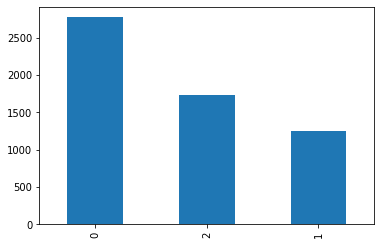

In [ ]:
dataset['Label'].value_counts().plot(kind='bar')

# SPLIT DATA

In [ ]:
data_train, data_test, label_train, label_test = train_test_split(
        dataset['Text'],
        dataset['Label'],
        test_size=0.2,
        random_state=40
)

# PIPELINE SVC

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
pipe = Pipeline([
  ('vect', CountVectorizer()),
  ('tfidf', TfidfTransformer()),
  ('clf', LinearSVC())
])


In [ ]:
pipe.fit(data_train, label_train)
print('Training set score: ' + str(pipe.score(data_train,label_train)))
print('Test set score: ' + str(pipe.score(data_train,label_train)))

Training set score: 0.9750217202432667
Test set score: 0.9750217202432667


In [ ]:
result = pipe.predict(['dapatkan diskon kfc'])

In [ ]:
label[int(result[0])]

'Promo'

# PIPELINE XGBOOST

In [ ]:
from xgboost import XGBClassifier


In [ ]:
pipe = Pipeline([
  ('vect', CountVectorizer()),
  ('tfidf', TfidfTransformer()),
  ('clf', XGBClassifier())
])

In [ ]:
pipe.fit(data_train, label_train)
print('Training set score: ' + str(pipe.score(data_train,label_train)))
print('Test set score: ' + str(pipe.score(data_train,label_train)))

Training set score: 0.9039965247610773
Test set score: 0.9039965247610773


# SAVING MODEL

In [ ]:
import pickle

In [ ]:
filename = 'anoabot_model_v1.pkl'
pickle.dump(pipe, open(filename, 'wb'))

# MENCOBA PREDIKSI DENGAN SAVED MODEL

In [ ]:
loaded_model = pickle.load(open('anoabot_model_v1.pkl', 'rb'))
result = loaded_model.score(data_test, label_test)
print(result)

0.9296875


In [ ]:
result = loaded_model.predict(['Kirimkan uang sebesar 2 ke nomor 03874242'])
print(result)
label[int(result[0])]


[1]


'Penipuan'